Imports and Preview Data

In [43]:
from itertools import groupby
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_style()
colors = ['#762a83','#9970ab','#c2a5cf','#e7d4e8','#d9f0d3','#a6dba0','#5aae61','#1b7837']

In [44]:
game_sales = pd.read_csv('top100videogamesales.csv')
game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [45]:
grouped = game_sales.groupby(['Genre']).sum().reset_index()

In [46]:
game_sales.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Questions

## 1. Regional Sales by Publisher: 
Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

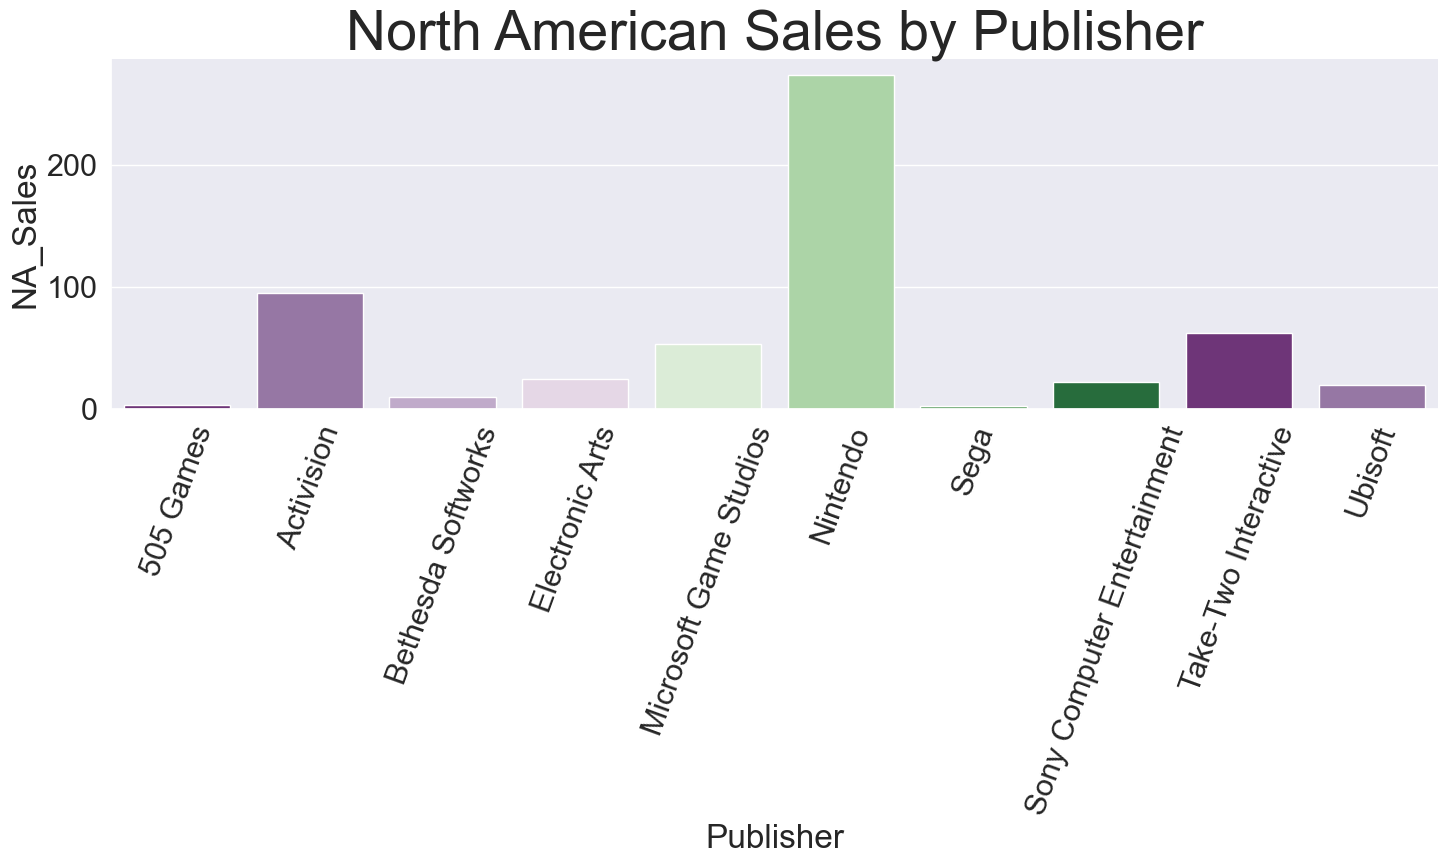

In [47]:
grouped_pub = game_sales.groupby(['Publisher']).sum().reset_index()

sns.catplot(data=grouped_pub, x='Publisher', y='NA_Sales', kind='bar', aspect=3, palette=colors)
plt.xticks(rotation=70)
plt.title('North American Sales by Publisher', fontsize = 40)
plt.show()

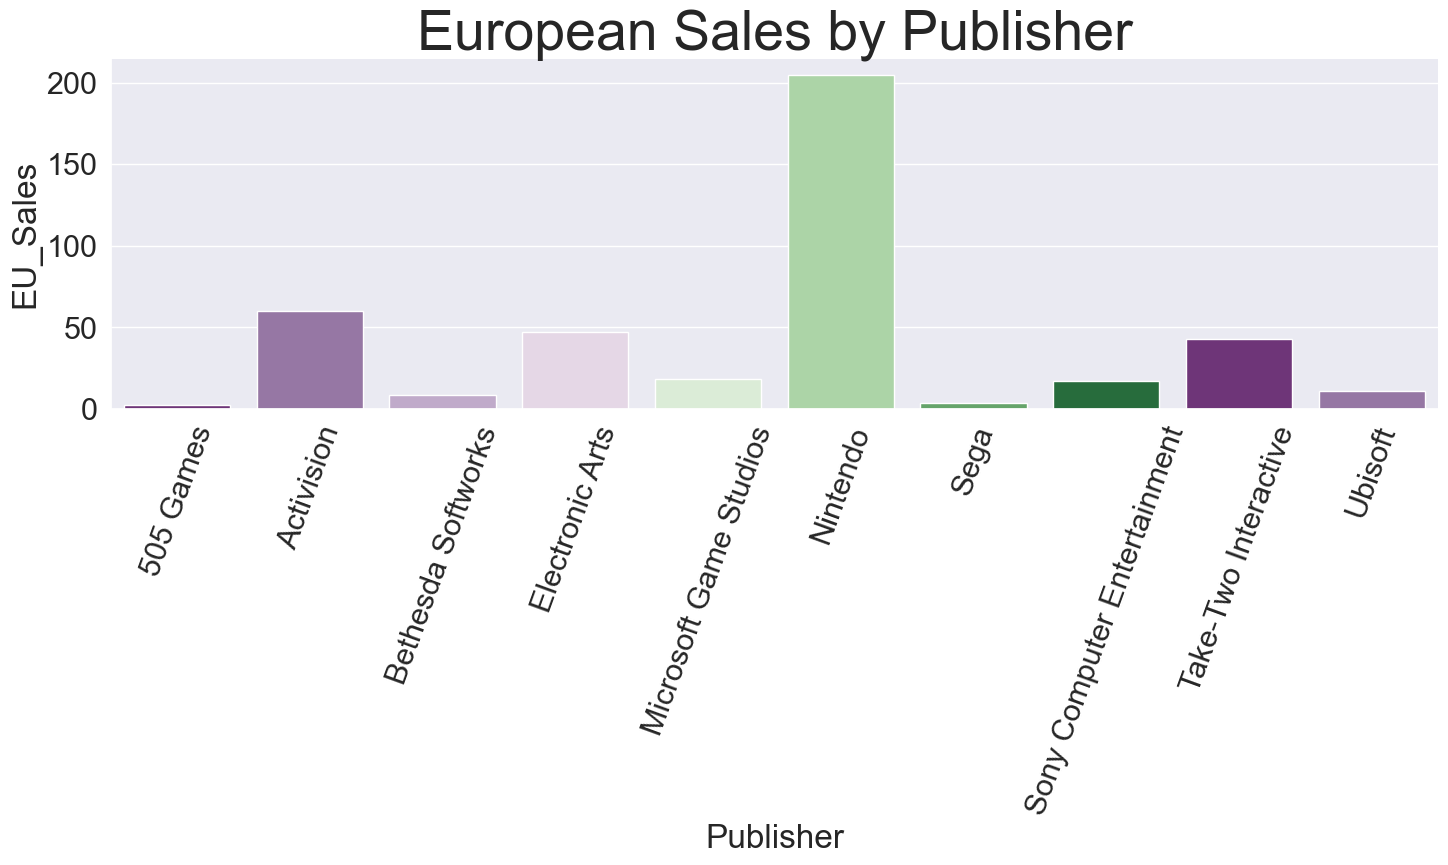

In [48]:
sns.catplot(data=grouped_pub, x='Publisher', y='EU_Sales', kind='bar', aspect=3, palette=colors)
plt.xticks(rotation=70)
plt.title('European Sales by Publisher', fontsize = 40)
plt.show()

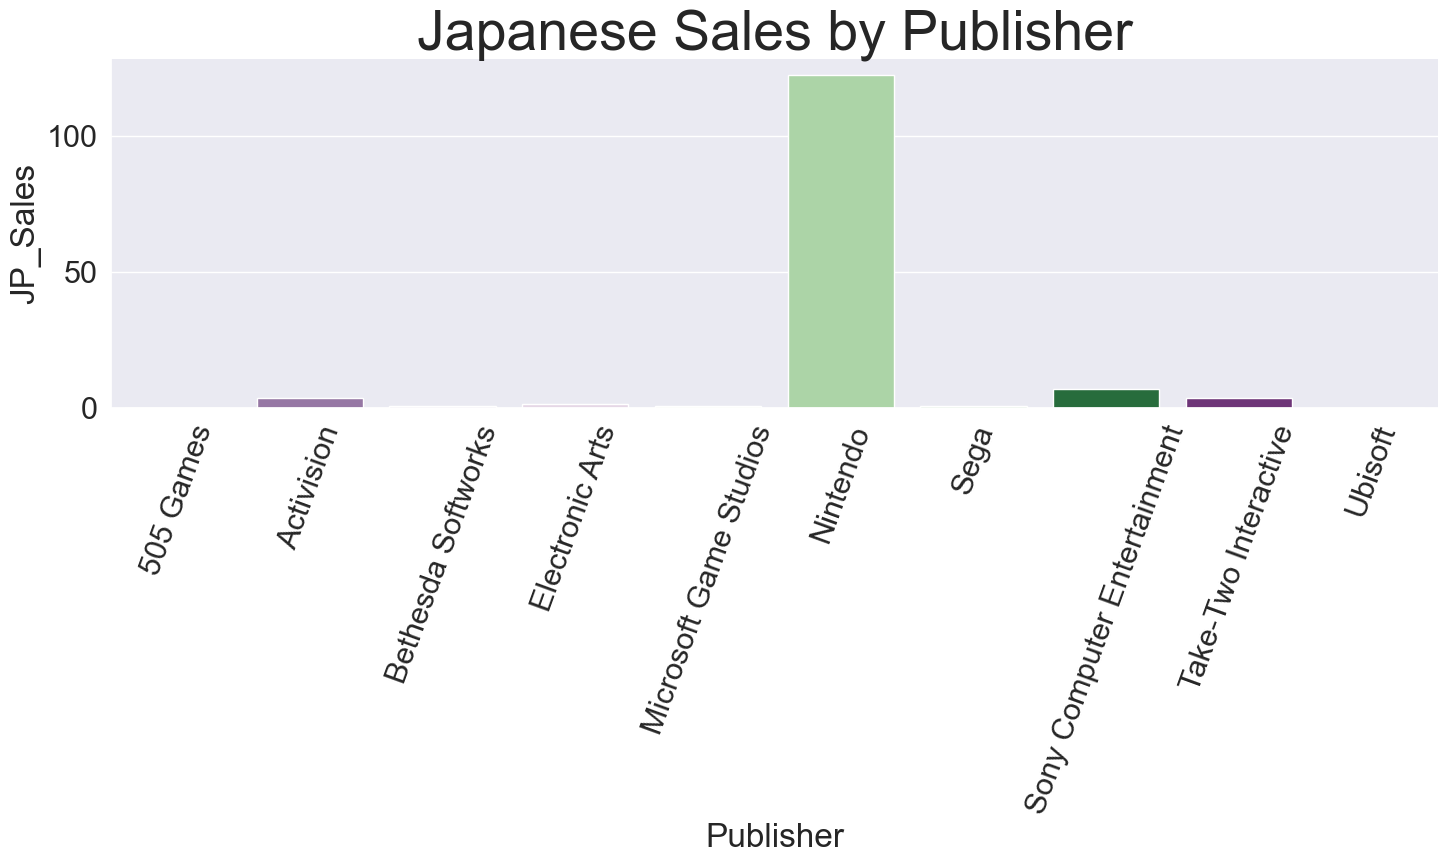

In [49]:
sns.catplot(data=grouped_pub, x='Publisher', y='JP_Sales', kind='bar', aspect=3, palette=colors)
plt.xticks(rotation=70)
plt.title('Japanese Sales by Publisher', fontsize = 40)
plt.show()

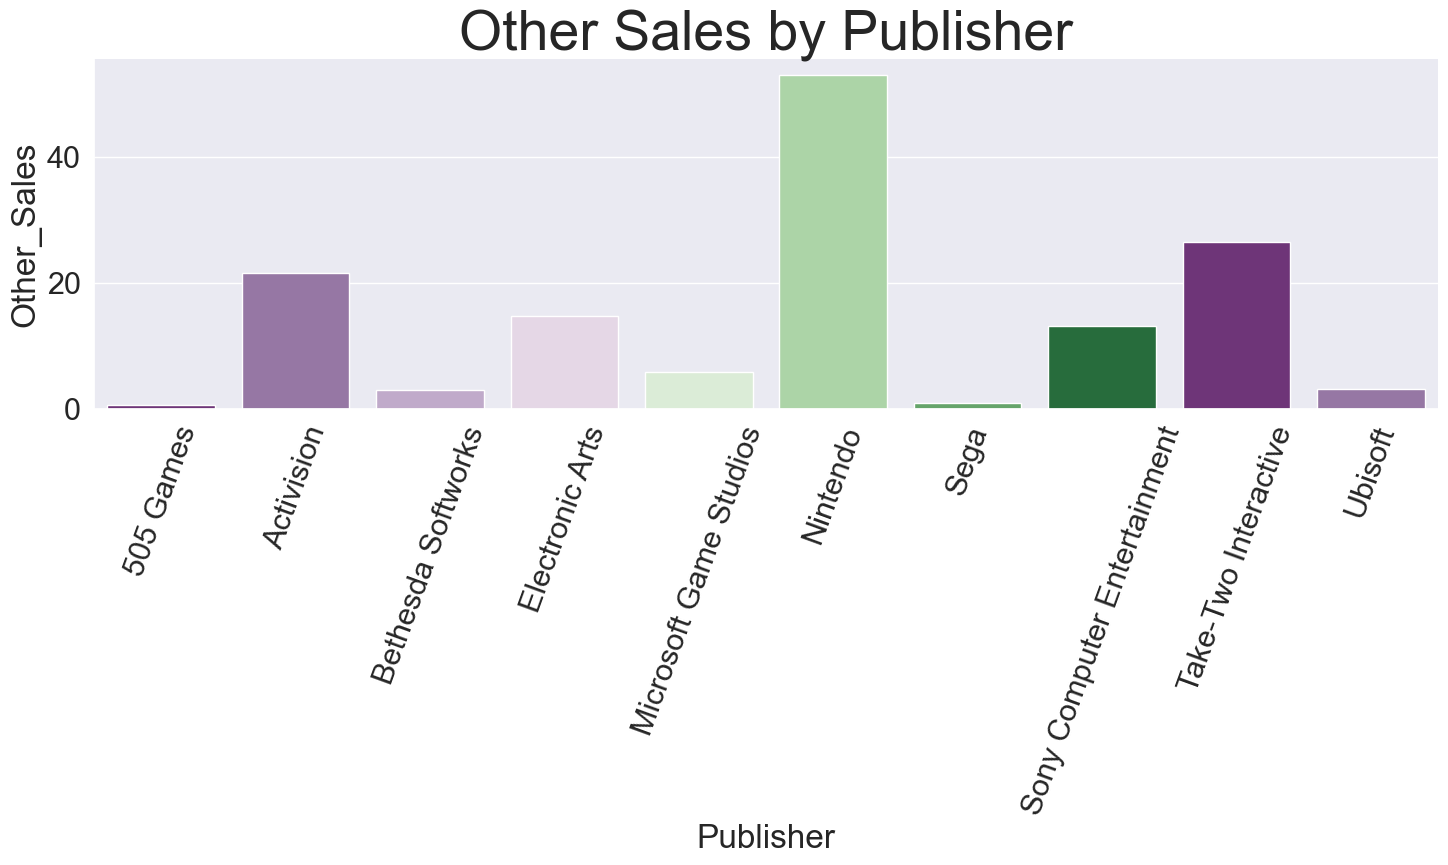

In [50]:
sns.catplot(data=grouped_pub, x='Publisher', y='Other_Sales', kind='bar', aspect=3, palette=colors)
plt.xticks(rotation=70)
plt.title('Other Sales by Publisher', fontsize = 40)
plt.show()

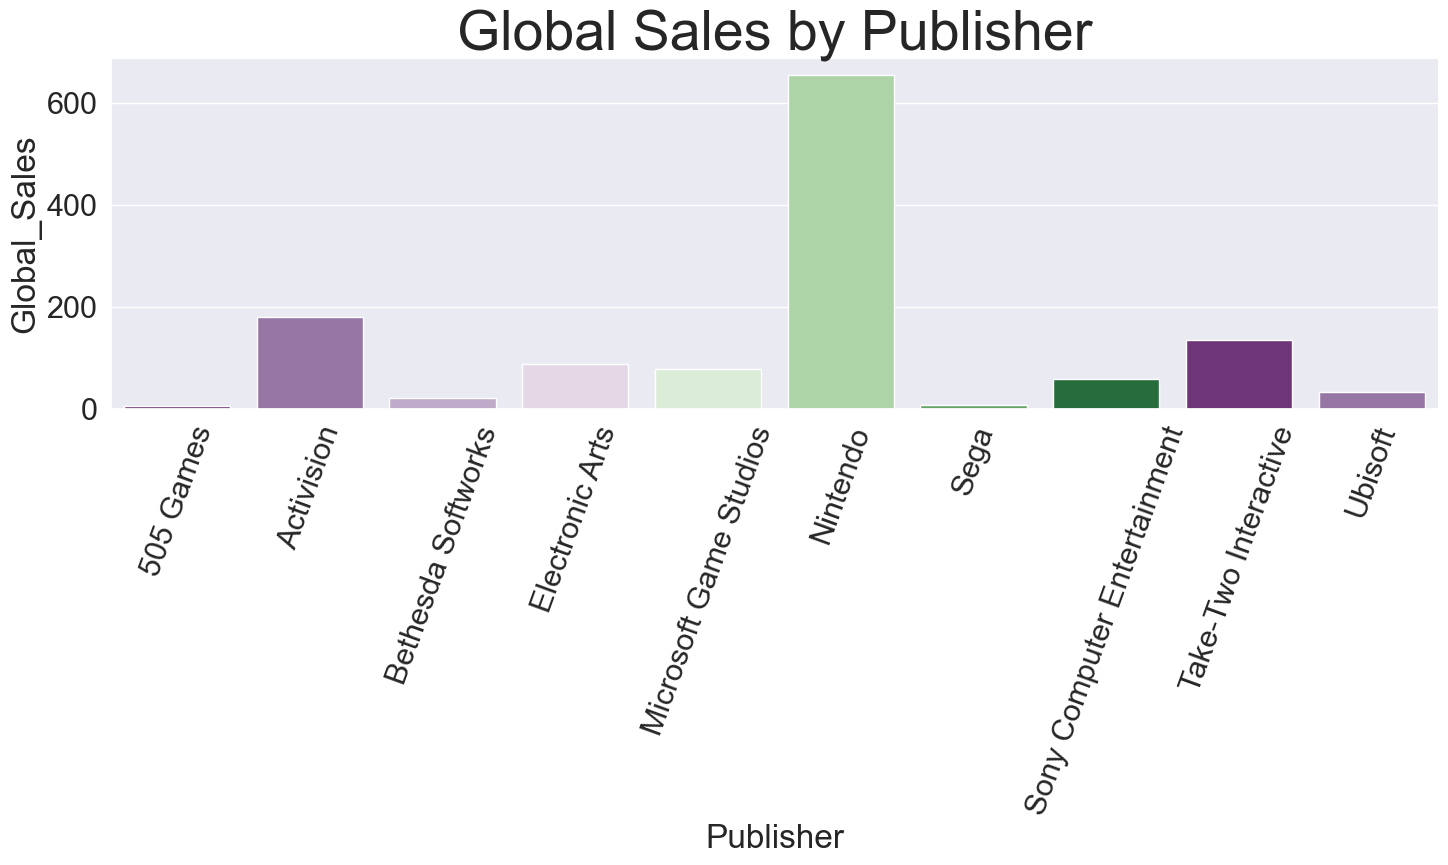

In [51]:
sns.catplot(data=grouped_pub, x='Publisher', y='Global_Sales', kind='bar', aspect=3, palette=colors)
plt.xticks(rotation=70)
plt.title('Global Sales by Publisher', fontsize = 40)
plt.show()

### Notes: 
All 5 regions have Nintendo as the highest grossing publisher. Japan and other regions have the lowest sales overall while global and North America regions have the highest sales.

## 2. Global Sales by Year: 
Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

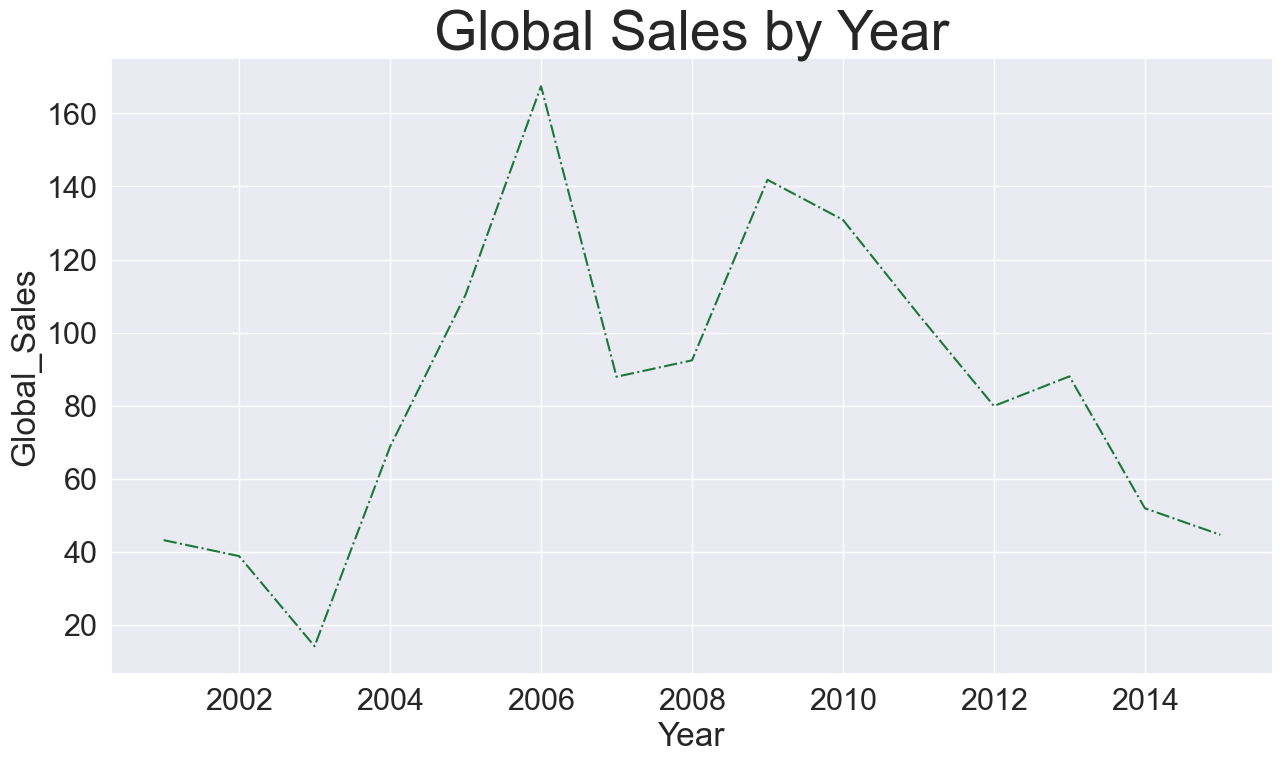

In [52]:
grouped_year = game_sales.groupby(['Year']).sum().reset_index()
sns.set(rc = {'figure.figsize':(15,8)}, font_scale=2)
sns.lineplot(data=grouped_year, x='Year', y='Global_Sales', color='#1b7837', linestyle='-.')
plt.title('Global Sales by Year', fontsize = 40)
plt.show()

### Notes: 
As can be seen in the chart, Global Sales were the highest in the year 2006. They were lowest in 2003. It seems game sales have been decreasing since 2009.

## 3. Global Sales Distribution for Action Games: 
Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

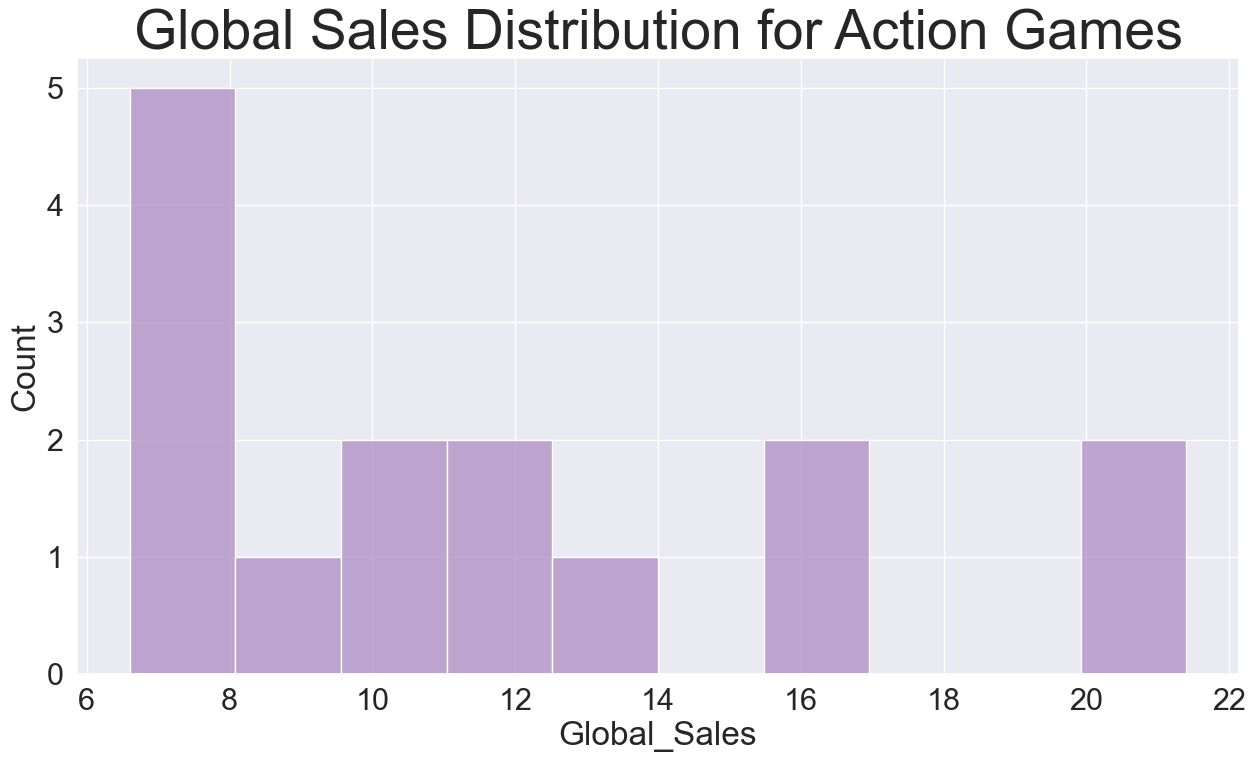

In [53]:
genre_action = game_sales[game_sales['Genre'] == 'Action']

sns.histplot(data=genre_action, x='Global_Sales', bins=10, color='#af8dc3')
plt.title('Global Sales Distribution for Action Games', fontsize = 40)
plt.show()

### Notes: 
It appears that action did not contribute largely to global sales. The majority were between 6-8 and only a few action games were above 20.

## 4. North American Sales by Genre: 
Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

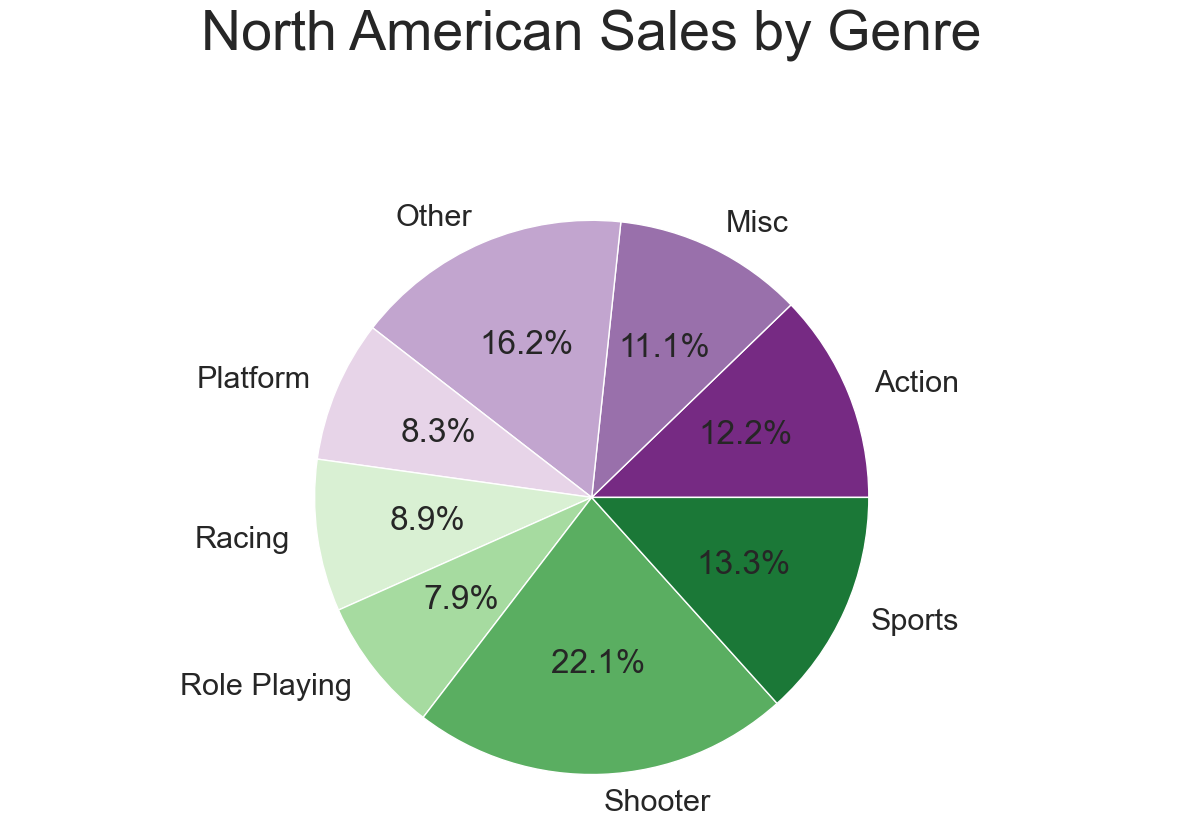

In [54]:
NA_Action = game_sales[game_sales['Genre'] == 'Action'].NA_Sales.sum()
NA_Sports = game_sales[game_sales['Genre'] == 'Sports'].NA_Sales.sum()
NA_Racing = game_sales[game_sales['Genre'] == 'Racing'].NA_Sales.sum()
NA_Other = game_sales[(game_sales['Genre'] == 'Fighting') | (game_sales['Genre'] == 'Puzzle') | (game_sales['Genre'] == 'Simulation') | (game_sales['Genre'] == 'Misc')].NA_Sales.sum()
NA_Platform = game_sales[game_sales['Genre'] == 'Platform'].NA_Sales.sum()
NA_Role_Playing = game_sales[game_sales['Genre'] == 'Role-Playing'].NA_Sales.sum()
NA_Shooter = game_sales[game_sales['Genre'] == 'Shooter'].NA_Sales.sum()
NA_Misc = game_sales[game_sales['Genre'] == 'Misc'].NA_Sales.sum()

NA_Sales_Genre = [NA_Action, NA_Misc, NA_Other, NA_Platform, NA_Racing, NA_Role_Playing, NA_Shooter, NA_Sports]
Label = ['Action', 'Misc', 'Other', 'Platform', 'Racing', 'Role Playing', 'Shooter', 'Sports'] 

plt.pie(NA_Sales_Genre, labels = Label, colors = colors, autopct = '%1.1f%%')
plt.title('North American Sales by Genre', fontsize = 40, pad=100)
plt.axis('equal')
plt.show()

### Notes: 
In North America, the largest percentage of games sold are Shooter games followed by Sports (ignoring the other category). The other category is made up of multiple smaller genres that together make up a large portion of the games genres sold.

## 5. European Sales by Genre: 
Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

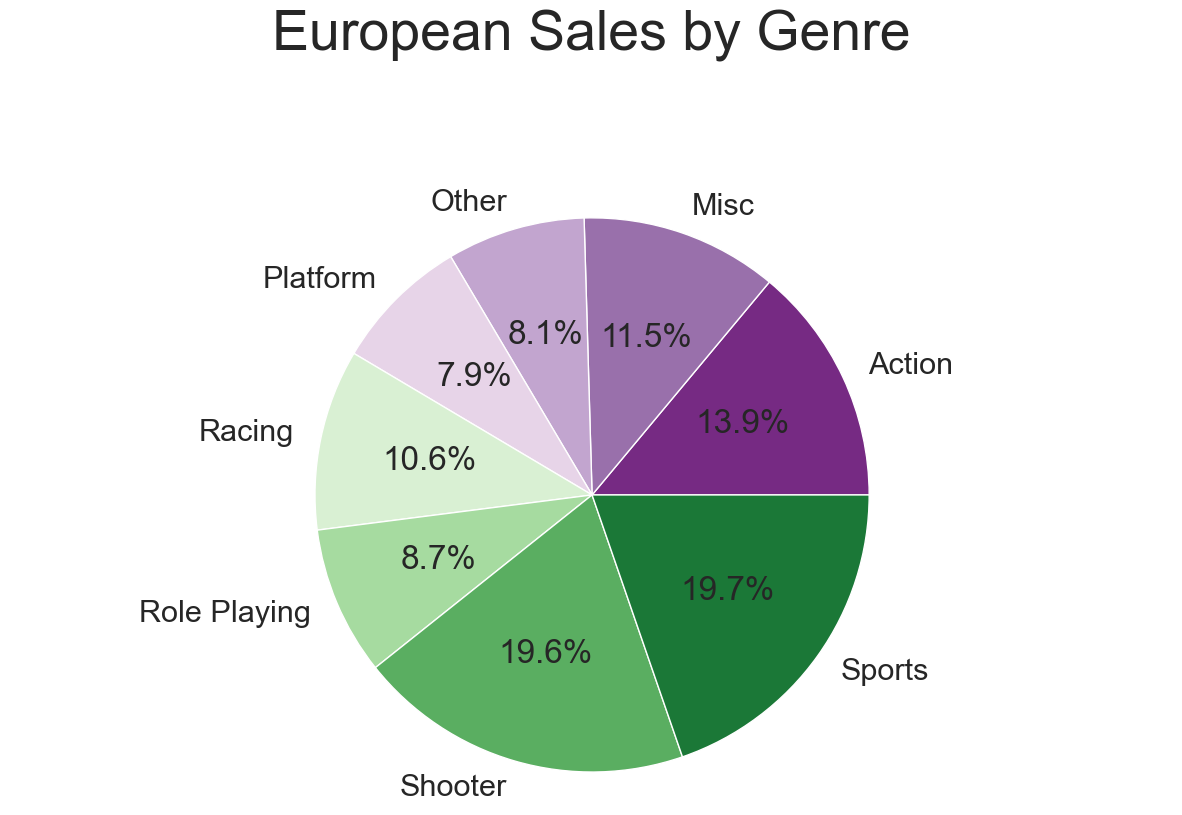

In [55]:
EU_Action = game_sales[game_sales['Genre'] == 'Action'].EU_Sales.sum()
EU_Sports = game_sales[game_sales['Genre'] == 'Sports'].EU_Sales.sum()
EU_Racing = game_sales[game_sales['Genre'] == 'Racing'].EU_Sales.sum()
EU_Other = game_sales[(game_sales['Genre'] == 'Fighting') | (game_sales['Genre'] == 'Puzzle') | (game_sales['Genre'] == 'Simulation')].EU_Sales.sum()
EU_Platform = game_sales[game_sales['Genre'] == 'Platform'].EU_Sales.sum()
EU_Role_Playing = game_sales[game_sales['Genre'] == 'Role-Playing'].EU_Sales.sum()
EU_Shooter = game_sales[game_sales['Genre'] == 'Shooter'].EU_Sales.sum()
EU_Misc = game_sales[game_sales['Genre'] == 'Misc'].EU_Sales.sum()

EU_Sales_Genre = [EU_Action, EU_Misc, EU_Other, EU_Platform, EU_Racing, EU_Role_Playing, EU_Shooter, EU_Sports]
Label = ['Action', 'Misc', 'Other', 'Platform', 'Racing', 'Role Playing', 'Shooter', 'Sports'] 

plt.pie(EU_Sales_Genre, labels = Label, colors = colors, autopct = '%1.1f%%')
plt.title('European Sales by Genre', fontsize = 40, pad=100)
plt.axis('equal')
plt.show()

### Notes: 
In Europe, the largest percentage of games sold are Shooter games followed by Sports. The smallest category is the Platform genre. 

## 6. Explain differences and similarities between the North American and European charts in markdown.

### Notes: 
Both America and Europe tend to favor shooter games and sports games. America has more games in the other category than Europe does. Overall, the distribution is very similar in the two continents. 

## 7. Count of Games by Platform: 
Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

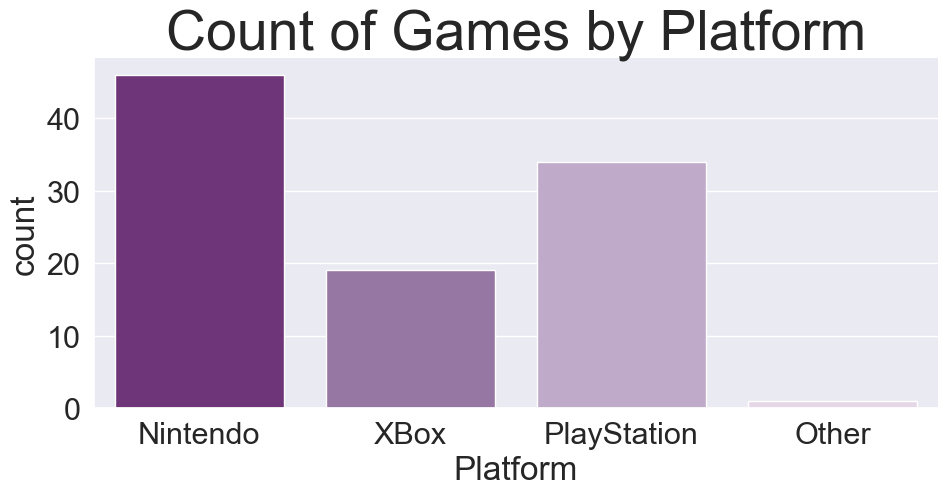

In [56]:
sns.catplot(data=game_sales, x='Platform', kind='count', aspect=2, palette=colors)
plt.title('Count of Games by Platform', fontsize = 40)
plt.show()

### Notes: 
Nintendo is the platform with the most games, followed by PlayStation and then XBox. Other platforms make the least amount of games in comparison. 

# Extra Credit

## 1. Determine the appropriate charts to answer the following questions
- What genre of game is present the most in the top 100 games from 2000-2015?
- What percentage of global sales does PlayStation have in the dataset?
- What is the distribution of sales for Shooter games?

### - What genre of game is present the most in the top 100 games from 2000-2015?

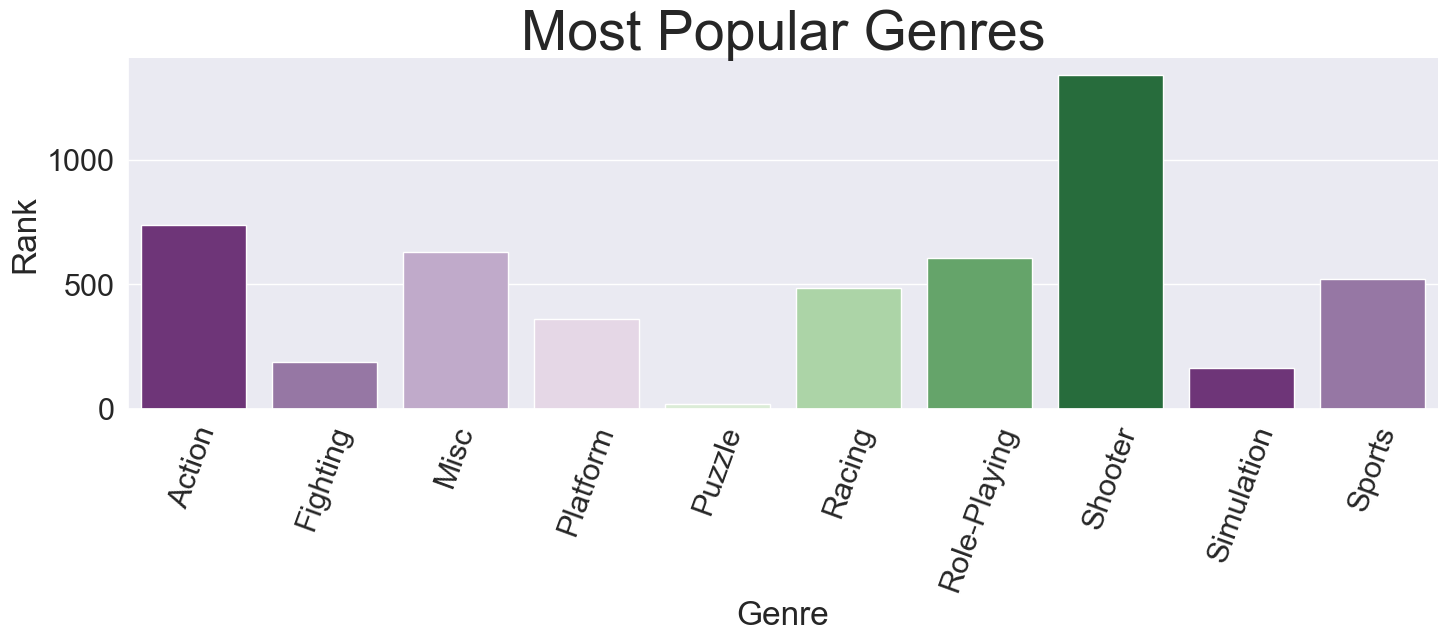

In [57]:
grouped_genre = game_sales.groupby(['Genre']).sum().reset_index()
sns.catplot(data=grouped_genre, x='Genre', y='Rank', kind='bar', aspect=3, palette=colors)
plt.xticks(rotation=70)
plt.title('Most Popular Genres', fontsize = 40)
plt.show()

### Notes:
The top genre for the games is the shooter genre, followed by action. Puzzle and simulation games are the least popular.

### - What percentage of global sales does PlayStation have in the dataset?

In [58]:
game_sales['Platform'].unique()

array(['Nintendo', 'XBox', 'PlayStation', 'Other'], dtype=object)

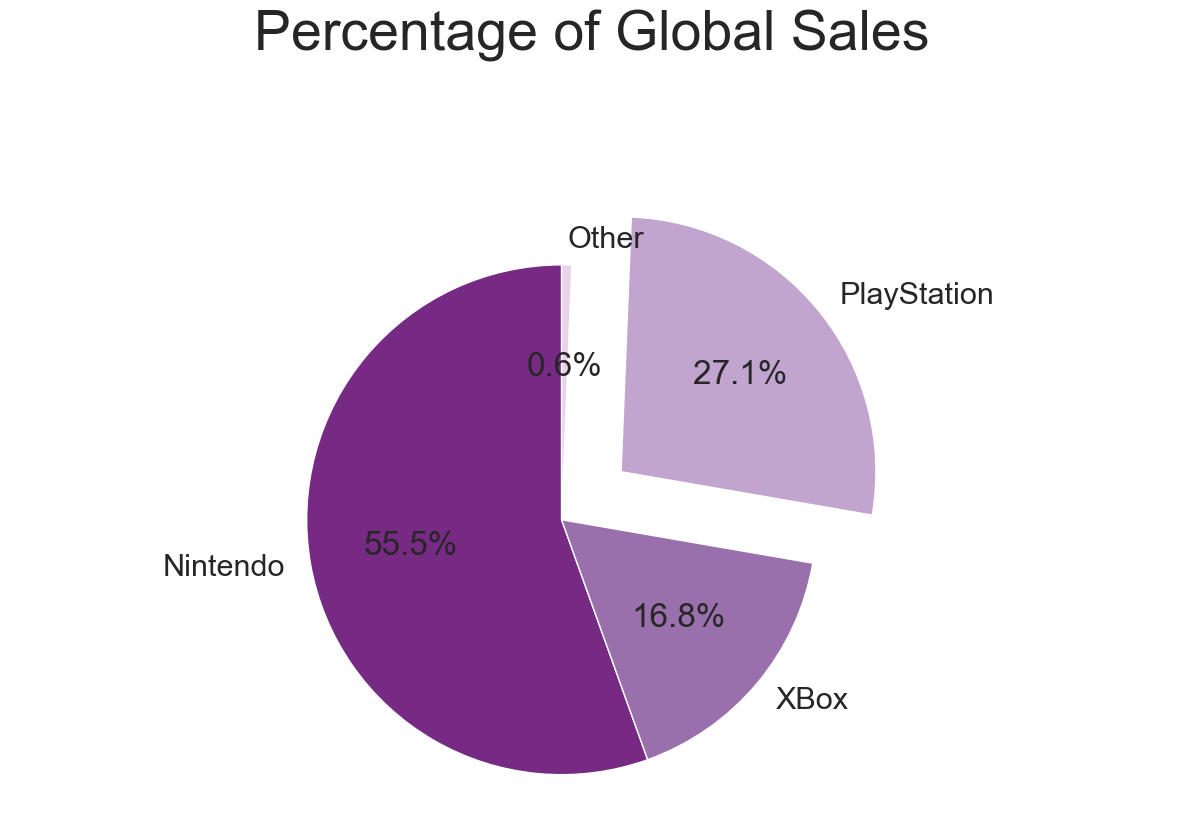

In [59]:
Nintendo = game_sales[game_sales['Platform'] == 'Nintendo'].Global_Sales.sum()
XBox = game_sales[game_sales['Platform'] == 'XBox'].Global_Sales.sum()
PlayStation = game_sales[game_sales['Platform'] == 'PlayStation'].Global_Sales.sum()
Other = game_sales[game_sales['Platform'] == 'Other'].Global_Sales.sum()

Platform_Global = [Nintendo, XBox, PlayStation, Other]
Label = ['Nintendo', 'XBox', 'PlayStation', 'Other'] 
explode = (0, 0, 0.3, 0)

plt.pie(Platform_Global, labels = Label, colors = colors, autopct = '%1.1f%%', explode=explode, startangle=90)
plt.title('Percentage of Global Sales', fontsize = 40, pad=100)

plt.axis('equal')
plt.show()

### Notes:
PlayStation makes up 27.1% of Global Sales. It is the second largest percentage after Nintendo.

### - What is the distribution of sales for Shooter games?

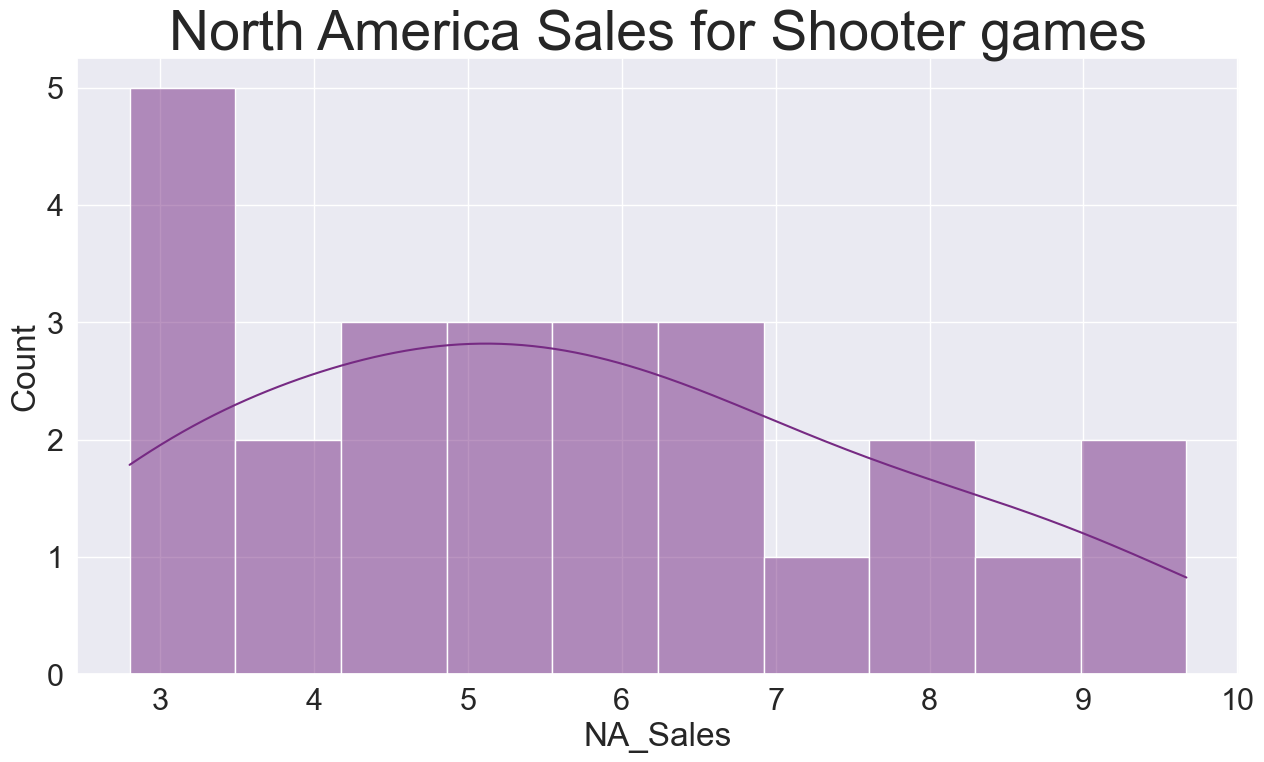

In [60]:
genre_shooter = game_sales[game_sales['Genre'] == 'Shooter']
sns.histplot(data=genre_shooter, x='NA_Sales', bins=10, kde=True, color='#762a83')
plt.title('North America Sales for Shooter games', fontsize = 40)
plt.show()

### Notes: 
The distribution in America seems to have a few extra counts in the lower end of sales. 

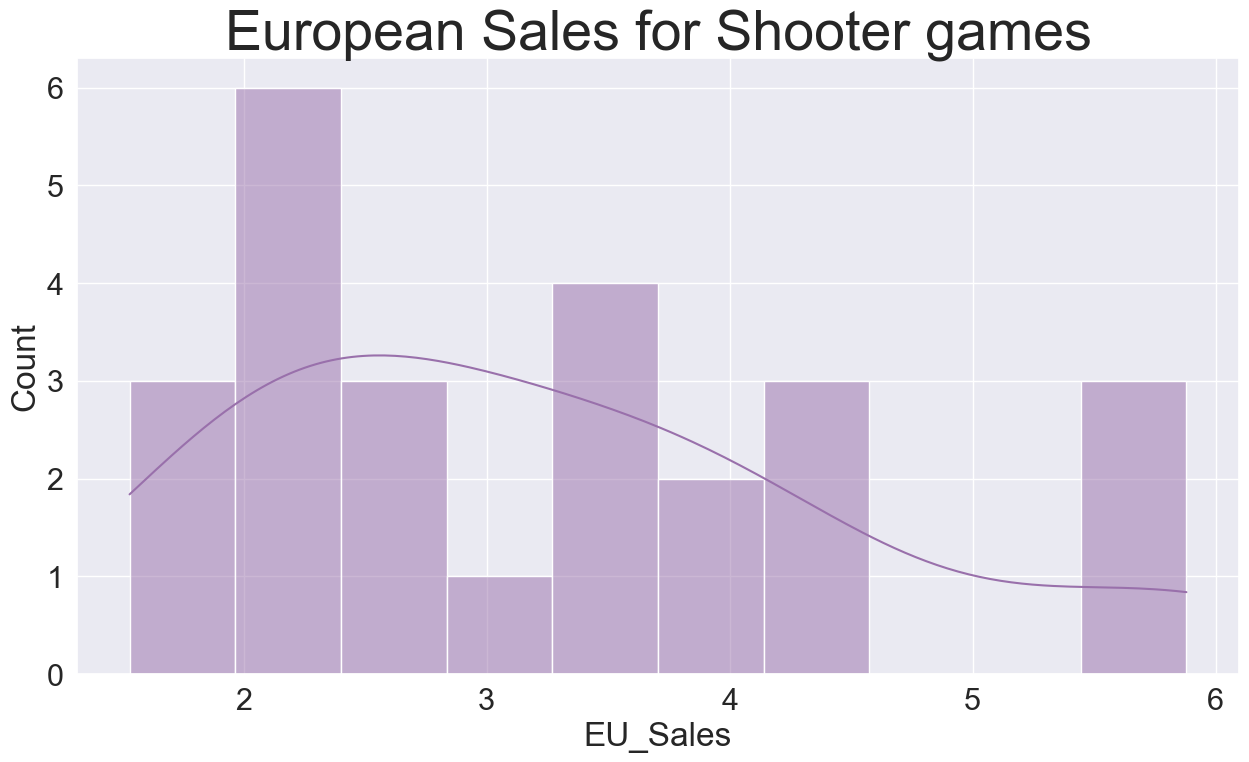

In [61]:
genre_shooter = game_sales[game_sales['Genre'] == 'Shooter']
sns.histplot(data=genre_shooter, x='EU_Sales', bins=10, kde=True, color='#9970ab')
plt.title('European Sales for Shooter games', fontsize = 40)
plt.show()

### Notes: 
The distribution in Europe has some outliers in between 5 and 6.

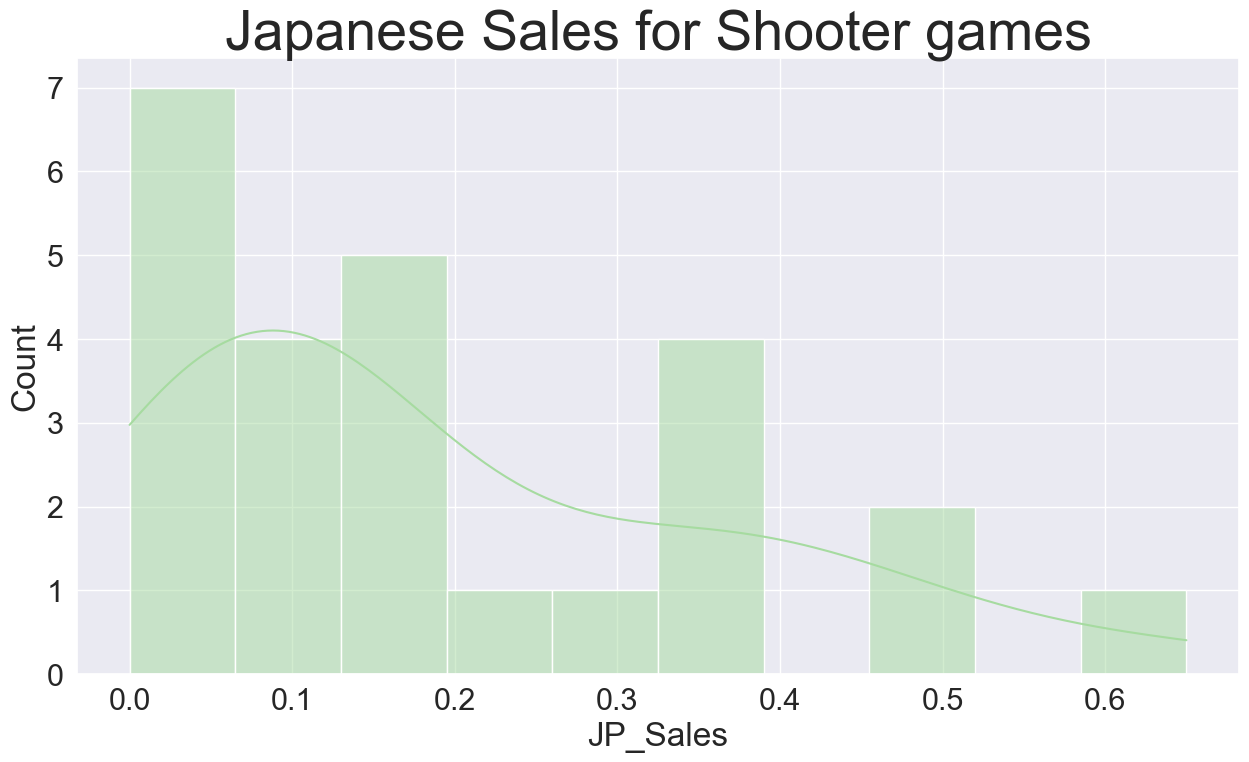

In [62]:
genre_shooter = game_sales[game_sales['Genre'] == 'Shooter']
sns.histplot(data=genre_shooter, x='JP_Sales', bins=10, kde=True, color='#a6dba0')
plt.title('Japanese Sales for Shooter games', fontsize = 40)
plt.show()

### Notes: 
The distribution in Japan is lower with a few outliers.

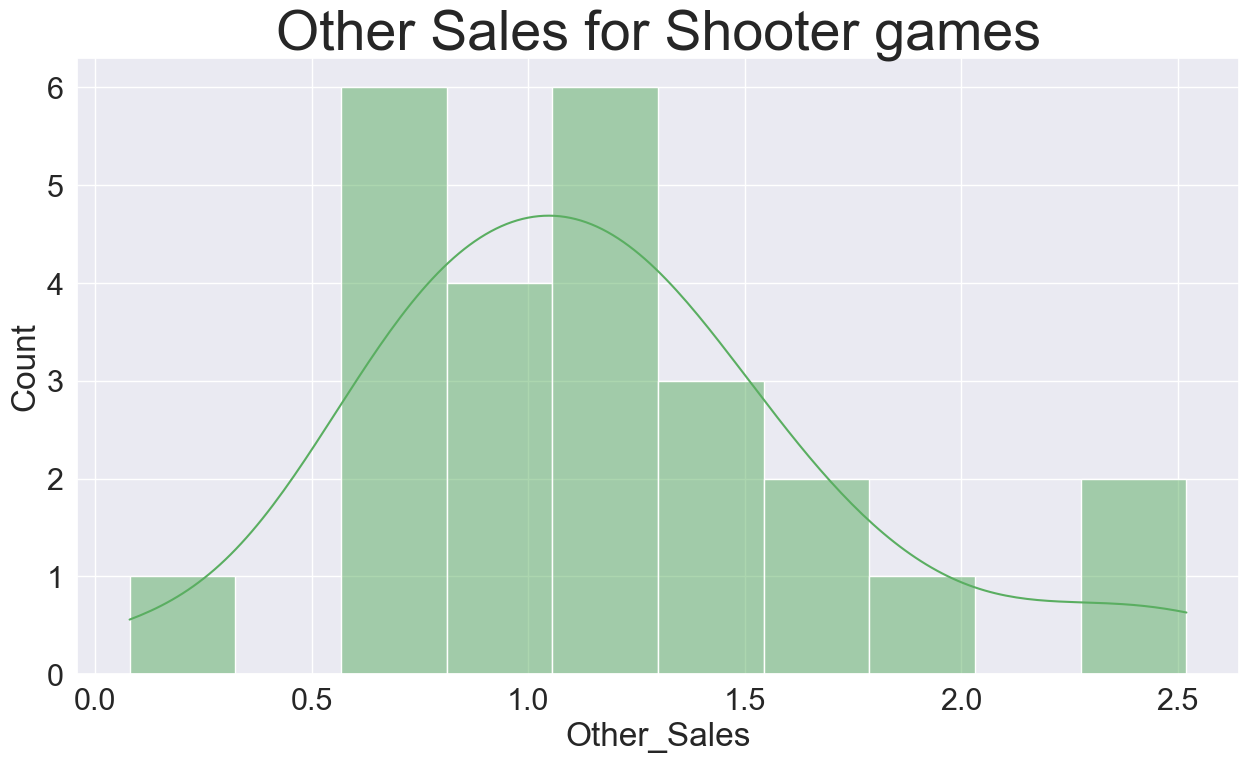

In [63]:
genre_shooter = game_sales[game_sales['Genre'] == 'Shooter']
sns.histplot(data=genre_shooter, x='Other_Sales', bins=10, kde=True, color='#5aae61')
plt.title('Other Sales for Shooter games', fontsize = 40)
plt.show()

### Notes: 
The distribution for Other sales has a nice bell curve centered between .5 and 1.5

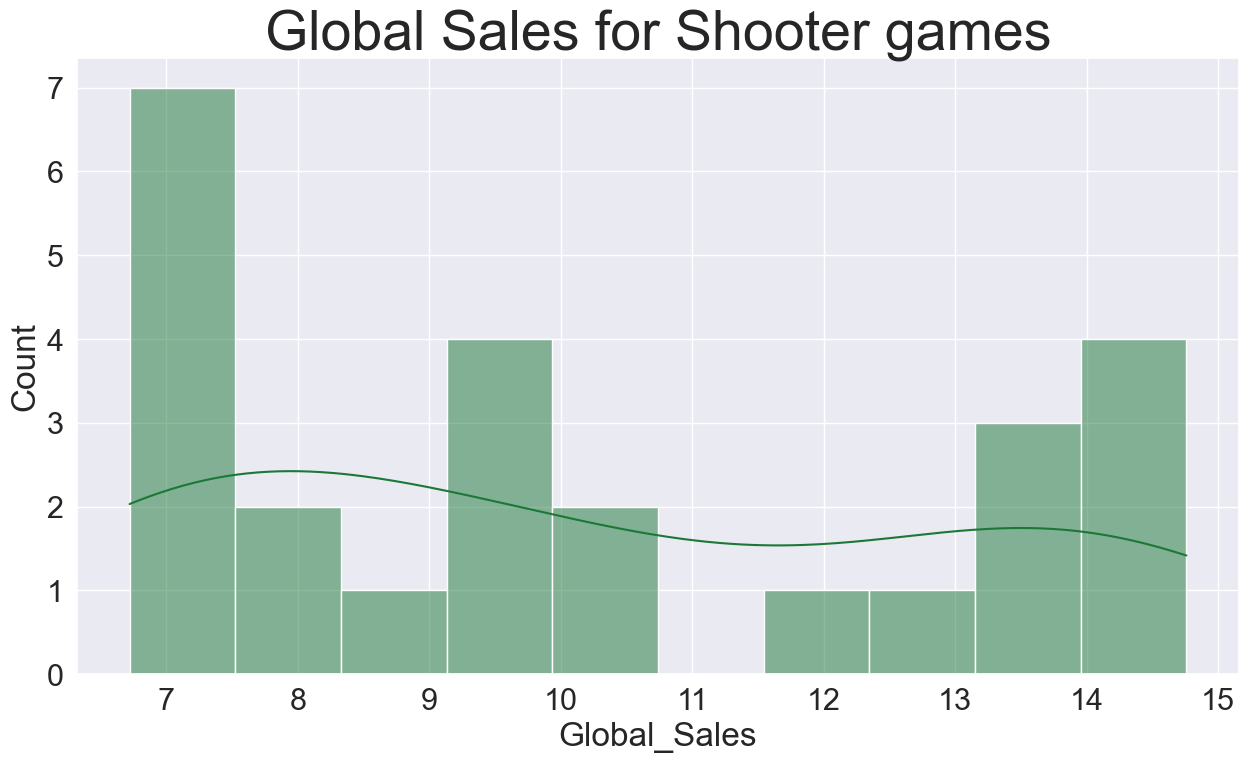

In [64]:
genre_shooter = game_sales[game_sales['Genre'] == 'Shooter']
sns.histplot(data=genre_shooter, x='Global_Sales', bins=10, kde=True, color='#1b7837')
plt.title('Global Sales for Shooter games', fontsize = 40)
plt.show()

### Notes: 
The distribution for Global sales varies widely but has the highest count around 7.